# Band Power Maps Analysis


In [1]:
%matplotlib widget
import numpy as np
from band_power_maps import (movie_path, denoised_movie_path, load_movie, crop_movie, analyze_band_power,
                            pipeline_analyse_band, show_quiver_on_frame, plot_direction_histogram,
                            build_analytic_cube, phase_gradient_cube)


In [2]:
# Parameters
MOUSE = "cfm002mjr"
DATE = 240510
REC = 'meas01'
T_START = 202.0
T_STOP = 204.0
STIMULUS_ONSET = 202.62
STIMULUS_DURATION = 0.55

FREQUENCY_BANDS = {
    'Delta': (1, 4, 2),
    'Theta': (4, 8, 2),
    'Theta-Ish': (3, 7, 2),
    'Beta': (12, 30, 20),
    'Low-Gamma': (30, 60, 20)}


In [3]:
# Load and crop movie
movie, fps = load_movie(movie_path(MOUSE, DATE, REC), denoised_movie_path(MOUSE, DATE, REC))
cropped_movie = crop_movie(movie, fps, T_START, T_STOP)

In [4]:
fps

np.float64(157.18327569957034)

Saving Delta: original fps=157.18327569957034, slowdown_factor=2, save_fps=78.59163784978517
Frame duration: 12.72 ms per frame


MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


Could not save MP4: unknown file extension: .mp4
Also saved with imagemagick: results/band_movie_delta_imagemagick.gif
Created Delta animation with 2x slowdown


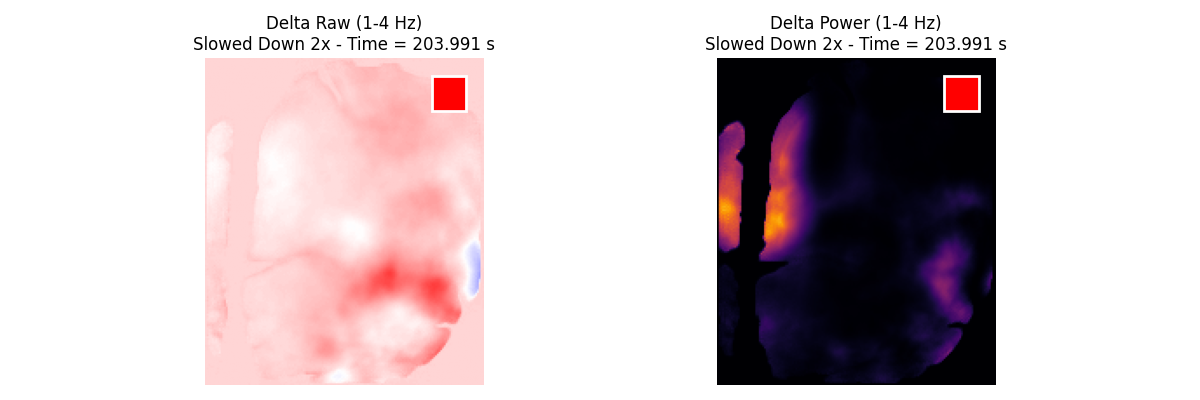

In [5]:
# Test single band to debug timing issue
# Try running just Delta first
band_name = 'Delta'
low_freq, high_freq, slowdown_factor = FREQUENCY_BANDS[band_name]
_, _, anim_delta = analyze_band_power(
    cropped_movie, fps, band_name, low_freq, high_freq,
    STIMULUS_ONSET, STIMULUS_DURATION, slowdown_factor, T_START, 
    f'results/band_movie_{band_name.lower()}.gif'
)

print(f"Created {band_name} animation with {slowdown_factor}x slowdown")


In [4]:
# DEMO: New Phase-Gradient Analysis Functions
# Import the new functions for analytic-signal cube and phase-gradient analysis
from band_power_maps import pipeline_analyse_band, show_quiver_on_frame, plot_direction_histogram

# Analyze a frequency band with the new pipeline
print("Running complete phase-gradient analysis for Theta band...")
result = pipeline_analyse_band(cropped_movie, fps, band=(4, 8), blur_sigma=1.0)

print(f"Analysis complete! Keys available: {list(result.keys())}")
print(f"Data shape: {result['amplitude'].shape}")
print(f"Mean wave speed: {np.mean(result['mean_speed']):.2f} pixels/second")
print(f"Mean direction: {np.mean(result['mean_dir']):.3f} radians ({np.degrees(np.mean(result['mean_dir'])):.1f}°)")


Running complete phase-gradient analysis for Theta band...
Analysis complete! Keys available: ['filtered_movie', 'band', 'fps', 'Z', 'amplitude', 'phase', 'inst_freq', 'grad_x', 'grad_y', 'speed', 'angle', 'mean_speed', 'mean_dir']
Data shape: (314, 188, 160)
Mean wave speed: 328653.95 pixels/second
Mean direction: 3.496 radians (200.3°)


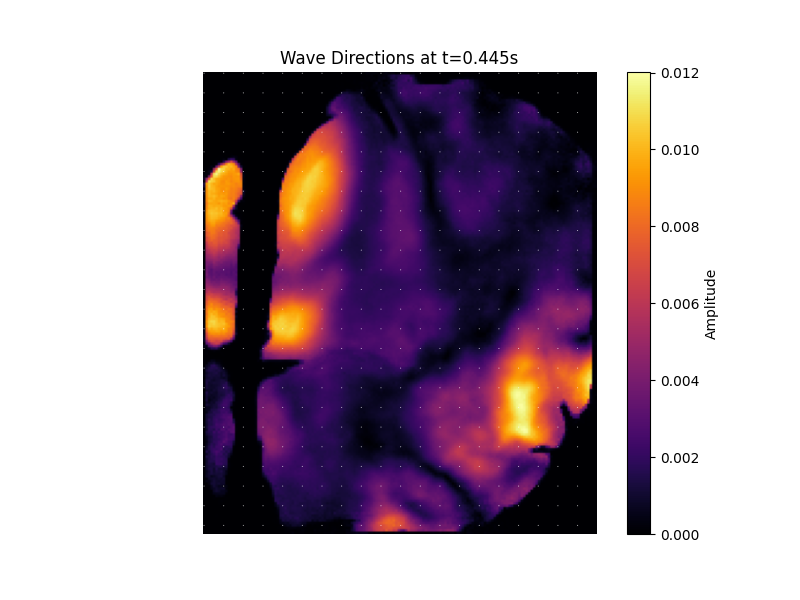

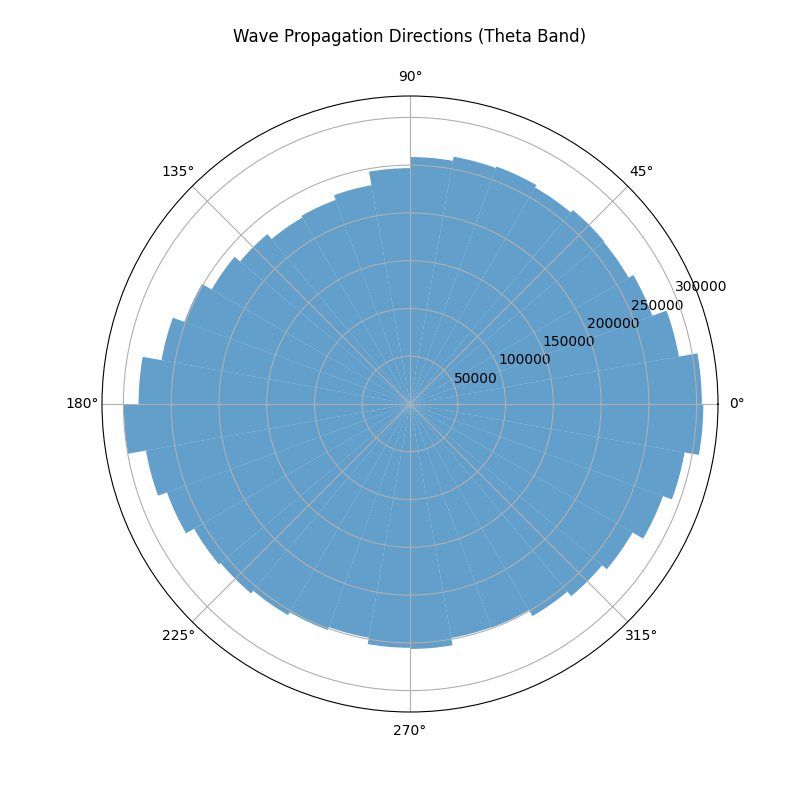

Plotted 9445120 direction vectors


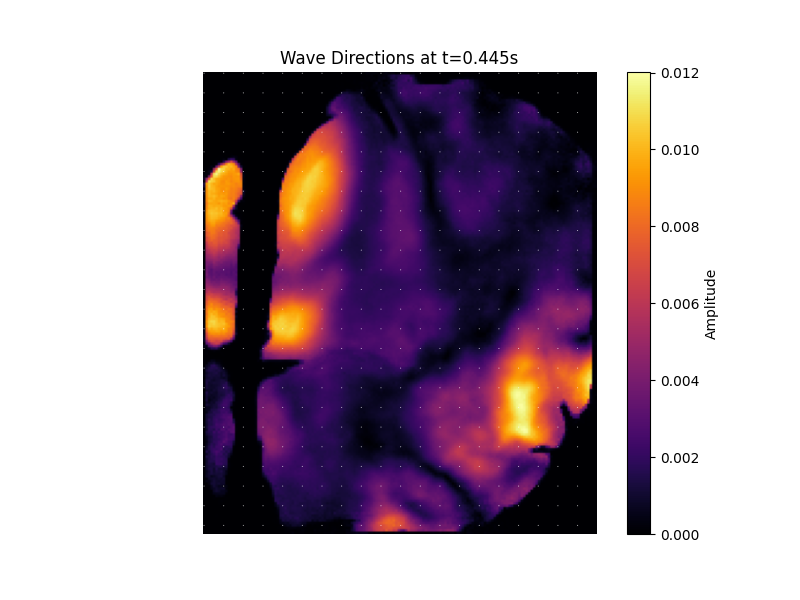

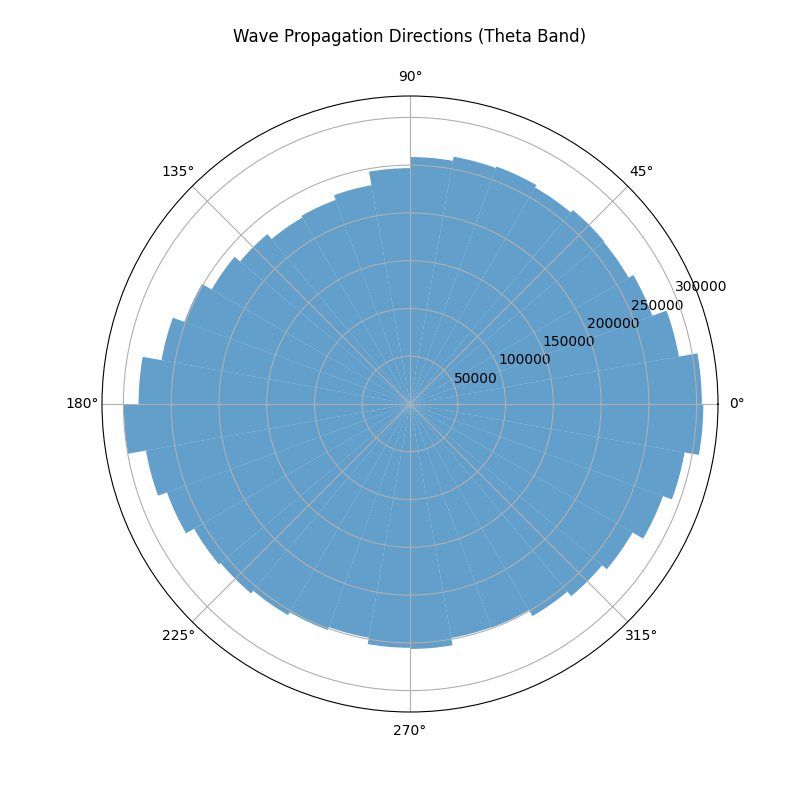

In [7]:
# Visualize wave direction vectors on a single frame
frame_idx = int(0.45*fps)#result['amplitude'].shape[0] // 2  # Middle frame

# Show quiver plot overlaid on amplitude
fig, ax = show_quiver_on_frame(
    result['amplitude'][frame_idx], 
    result['grad_x'][frame_idx], 
    result['grad_y'][frame_idx],
    step=8, scale=20, title=f"Wave Directions at t={frame_idx/fps:.3f}s"
)
fig.show()

# Plot direction histogram over all space and time
directions = result['angle'].flatten()
fig, ax = plot_direction_histogram(directions, bins=36, title="Wave Propagation Directions (Theta Band)")
fig.show()

print(f"Plotted {len(directions[np.isfinite(directions)])} direction vectors")
